In [99]:
import os
from netCDF4 import Dataset
from wrf import getvar, interpline, CoordPair, xy_to_ll, ll_to_xy, extract_times, ALL_TIMES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [232]:
pers17  = ["2017-01-14","2017-01-21","2017-01-24","2017-01-30","2017-02-02",\
        "2017-02-25","2017-03-08","2017-03-13","2017-03-21","2017-03-25"]
pers18  = ["2018-01-10","2018-01-16","2018-01-21","2018-02-14","2018-02-17",\
        "2018-03-05","2018-03-17","2018-03-22"]
ssts    = ["-3sst","-2sst","-1sst","","+1sst","+2sst","+3sst"]

In [352]:
pdf     = pd.read_csv('rain_sen_vnp_DT.csv')
pdf     = pdf[pdf['mm/d']>0]
pdf.index = pd.to_datetime(pdf['D'])
pdf17   = pdf[pdf.index.isin(pers17)]
pdf18   = pdf[pdf.index.isin(pers18)]
pdf_cu  = pdf.drop_duplicates(subset='cuenca')
pdf_es_17 = pdf17.drop_duplicates(subset='estacion')

In [266]:
pers17[7]

'2017-03-13'

In [355]:
ncfile  = Dataset("wrfout_d01_2017-03-13_00:00:00")
rainnc  = getvar(ncfile,'RAINNC',timeidx=ALL_TIMES)
rainc   = getvar(ncfile,'RAINC',timeidx=ALL_TIMES)
raint   = rainc+rainnc
times   = extract_times(ncfile,timeidx=ALL_TIMES)
times   = pd.Series(times)
ti      = pd.Series(pd.to_datetime(pers17[7])+timedelta(hours=6))
tf      = ti+timedelta(days=1)
#raint_i = raint[times.isin(ti),:,:]
#raint_f = raint[times.isin(tf),:,:]
#raint_p = raint_f-raint_i
for index, row in pdf_es_17.iterrows():
    x_y = ll_to_xy(ncfile, row['lat'],row['lon'])
    raint_i = raint[times.isin(ti),x_y[1],x_y[0]]
    raint_f = raint[times.isin(tf),x_y[1],x_y[0]]
    raint_e = raint_f[0]-raint_i[0]
    wrf = 'wrf'#+sst
    #df.loc[(df["B"] > 50) & (df["C"] == 900), "A"]
    joe=pdf17[(pdf17.index==pd.to_datetime(pers17[7]))&(pdf17['estacion']==row['estacion'])]

In [356]:
joe

,D,mm/d,lat,lon,alt,cod_cu,cuenca,cod_es,estacion
D,,,,,,,,,
2017-03-13,2017-03-13,18.1,-11.47639,-76.67056,2468.0,137556,Cuenca Chillón,111159,SAN BUENAVENTURA


In [ ]:
for per in pers17:
    for sst in ssts:
        ncfile  = Dataset("wrfout_d01_"+per+"_00:00:00"+sst)
        rainnc  = getvar(ncfile,'RAINNC',timeidx=ALL_TIMES)
        rainc   = getvar(ncfile,'RAINC',timeidx=ALL_TIMES)
        raint   = rainc+rainnc
        times   = extract_times(ncfile,timeidx=ALL_TIMES)
        times   = pd.Series(times)
        ti      = pd.Series(pd.to_datetime(per)+timedelta(hours=6))
        tf      = ti+timedelta(days=1)
        #raint_i = raint[times.isin(ti),:,:]
        #raint_f = raint[times.isin(tf),:,:]
        #raint_p = raint_f-raint_i
        for index, row in pdf_es_17.iterrows():
            x_y = ll_to_xy(ncfile, row['lat'],row['lon'])
            raint_i = raint[times.isin(ti),x_y[1],x_y[0]]
            raint_f = raint[times.isin(tf),x_y[1],x_y[0]]
            raint_e = raint_f-raint_i
            wrf = 'wrf'+sst
            pdf17.loc[pd.to_datetime(per),wrf]=raint_e
pdf17.to_csv('data_wrf_sen_sst.csv',encoding='utf-8',index=False)

In [228]:
ncfile  = Dataset("wrfout_d01_2017-03-13_00:00:00")
x_y     = ll_to_xy(ncfile, pdf.iloc[2,2], pdf.iloc[2,3])
rainnc  = getvar(ncfile,'RAINNC',timeidx=ALL_TIMES)
rainc   = getvar(ncfile,'RAINC',timeidx=ALL_TIMES)

In [229]:
times   = extract_times(ncfile,timeidx=ALL_TIMES)
times   = pd.Series(times)

In [254]:
#timei = datetime.strptime(pers17[0],'%Y-%m-%d')+timedelta(hours=6)
#ti = pers17[0]+' 06:00:00'
ti=pd.Series(pd.to_datetime(pers17[0])+timedelta(hours=6))

In [259]:
tf=ti+timedelta(days=1)

In [263]:
raint = rainnc+rainc
raint[15,:,:]-raint[19,:,:]

<xarray.DataArray (south_north: 89, west_east: 149)>
array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.26246563,
        -0.00127188,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.61107534,
        -0.00130485,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 -92.298584 ... -68.10141
    XLAT     (south_north, west_east) float32 -15.043976 ... -0.83234406
Dimensions without coordinates: south_north, west_east

In [14]:
pdf17[pdf17['cod_es']=='107016']

,D,mm/d,lat,lon,alt,cod_cu,cuenca,cod_es,estacion
D,,,,,,,,,
2017-01-14,2017-01-14,9.9,-7.35703,-78.43414,2564.0,13774,Cuenca Jequetepeque,107016,JESUS
2017-01-21,2017-01-21,4.3,-7.35703,-78.43414,2564.0,13774,Cuenca Jequetepeque,107016,JESUS
2017-01-24,2017-01-24,0.2,-7.35703,-78.43414,2564.0,13774,Cuenca Jequetepeque,107016,JESUS
2017-02-02,2017-02-02,0.2,-7.35703,-78.43414,2564.0,13774,Cuenca Jequetepeque,107016,JESUS
2017-03-08,2017-03-08,20.8,-7.35703,-78.43414,2564.0,13774,Cuenca Jequetepeque,107016,JESUS
2017-03-13,2017-03-13,12.4,-7.35703,-78.43414,2564.0,13774,Cuenca Jequetepeque,107016,JESUS
2017-03-21,2017-03-21,0.9,-7.35703,-78.43414,2564.0,13774,Cuenca Jequetepeque,107016,JESUS
2017-03-25,2017-03-25,5.0,-7.35703,-78.43414,2564.0,13774,Cuenca Jequetepeque,107016,JESUS


In [15]:
pdf17[pdf17['cod_cu']==13774]

,D,mm/d,lat,lon,alt,cod_cu,cuenca,cod_es,estacion
D,,,,,,,,,
2017-01-14,2017-01-14,9.9,-7.35703,-78.43414,2564.0,13774,Cuenca Jequetepeque,107016,JESUS
2017-01-21,2017-01-21,4.3,-7.35703,-78.43414,2564.0,13774,Cuenca Jequetepeque,107016,JESUS
2017-01-24,2017-01-24,0.2,-7.35703,-78.43414,2564.0,13774,Cuenca Jequetepeque,107016,JESUS
2017-02-02,2017-02-02,0.2,-7.35703,-78.43414,2564.0,13774,Cuenca Jequetepeque,107016,JESUS
2017-03-08,2017-03-08,20.8,-7.35703,-78.43414,2564.0,13774,Cuenca Jequetepeque,107016,JESUS
2017-03-13,2017-03-13,12.4,-7.35703,-78.43414,2564.0,13774,Cuenca Jequetepeque,107016,JESUS
2017-03-21,2017-03-21,0.9,-7.35703,-78.43414,2564.0,13774,Cuenca Jequetepeque,107016,JESUS
2017-03-25,2017-03-25,5.0,-7.35703,-78.43414,2564.0,13774,Cuenca Jequetepeque,107016,JESUS
2017-01-14,2017-01-14,1.7,-7.28461,-78.67611,1307.0,13774,Cuenca Jequetepeque,107017,MAGDALENA


In [30]:
cuencas.iloc[3,6]

'Cuenca Santa'

In [46]:
pdf17[pdf17['cod_es']=='107016']['mm/d']

D
2017-01-14     9.9
2017-01-21     4.3
2017-01-24     0.2
2017-02-02     0.2
2017-03-08    20.8
2017-03-13    12.4
2017-03-21     0.9
2017-03-25     5.0
Name: mm/d, dtype: float64

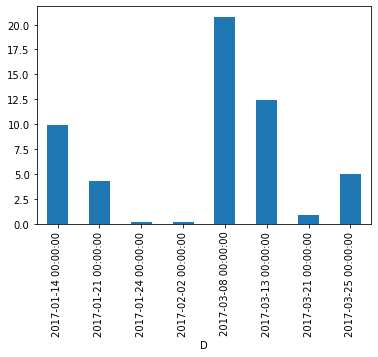

In [60]:
pdf17[pdf17['cod_es']=='107016']['mm/d'].plot.bar()

In [88]:
timejoe=pdf17[pdf17['cod_es']=='107016'].index+timedelta(hours=6)

In [102]:
dato1=rainnc[times.isin(timejoe),x_y[1],x_y[0]]

In [207]:
pdf2=pdf17[pdf17['cod_es']=='107016']

In [209]:
pdf2.loc[pd.to_datetime('2017-01-15'),'wrf']=15.5

In [211]:
pdf2.sort_index()

,D,mm/d,lat,lon,alt,cod_cu,cuenca,cod_es,estacion,wrf
D,,,,,,,,,,
2017-01-14,2017-01-14,9.9,-7.35703,-78.43414,2564.0,13774.0,Cuenca Jequetepeque,107016,JESUS,NaN
2017-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5
2017-01-21,2017-01-21,4.3,-7.35703,-78.43414,2564.0,13774.0,Cuenca Jequetepeque,107016,JESUS,NaN
2017-01-24,2017-01-24,0.2,-7.35703,-78.43414,2564.0,13774.0,Cuenca Jequetepeque,107016,JESUS,NaN
2017-02-02,2017-02-02,0.2,-7.35703,-78.43414,2564.0,13774.0,Cuenca Jequetepeque,107016,JESUS,NaN
2017-03-08,2017-03-08,20.8,-7.35703,-78.43414,2564.0,13774.0,Cuenca Jequetepeque,107016,JESUS,NaN
2017-03-13,2017-03-13,12.4,-7.35703,-78.43414,2564.0,13774.0,Cuenca Jequetepeque,107016,JESUS,NaN
2017-03-21,2017-03-21,0.9,-7.35703,-78.43414,2564.0,13774.0,Cuenca Jequetepeque,107016,JESUS,NaN
2017-03-25,2017-03-25,5.0,-7.35703,-78.43414,2564.0,13774.0,Cuenca Jequetepeque,107016,JESUS,NaN


In [187]:
pdf2

,D,mm/d,lat,lon,alt,cod_cu,cuenca,cod_es,estacion,wrf
D,,,,,,,,,,
2017-01-14 00:00:00,2017-01-14,9.9,-7.35703,-78.43414,2564.0,13774.0,Cuenca Jequetepeque,107016,JESUS,NaN
2017-01-21 00:00:00,2017-01-21,4.3,-7.35703,-78.43414,2564.0,13774.0,Cuenca Jequetepeque,107016,JESUS,NaN
2017-01-24 00:00:00,2017-01-24,0.2,-7.35703,-78.43414,2564.0,13774.0,Cuenca Jequetepeque,107016,JESUS,NaN
2017-02-02 00:00:00,2017-02-02,0.2,-7.35703,-78.43414,2564.0,13774.0,Cuenca Jequetepeque,107016,JESUS,NaN
2017-03-08 00:00:00,2017-03-08,20.8,-7.35703,-78.43414,2564.0,13774.0,Cuenca Jequetepeque,107016,JESUS,NaN
2017-03-13 00:00:00,2017-03-13,12.4,-7.35703,-78.43414,2564.0,13774.0,Cuenca Jequetepeque,107016,JESUS,NaN
2017-03-21 00:00:00,2017-03-21,0.9,-7.35703,-78.43414,2564.0,13774.0,Cuenca Jequetepeque,107016,JESUS,NaN
2017-03-25 00:00:00,2017-03-25,5.0,-7.35703,-78.43414,2564.0,13774.0,Cuenca Jequetepeque,107016,JESUS,NaN
2017-01-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5


In [108]:
times[times.isin(timejoe)]

2   2017-03-13 06:00:00
dtype: datetime64[ns]

In [169]:
pdf2.loc[:,['wrf','mm/d']]

,wrf,mm/d
D,,
2017-01-14 00:00:00,1.550000e+01,9.9
2017-01-21 00:00:00,1.580000e+01,4.3
2017-01-24 00:00:00,1.005000e+02,0.2
2017-02-02 00:00:00,1.540000e+01,0.2
2017-03-08 00:00:00,NaN,20.8
2017-03-13 00:00:00,NaN,12.4
2017-03-21 00:00:00,NaN,0.9
2017-03-25 00:00:00,4.496875e-07,5.0
2017-01-15,1.550000e+01,NaN


In [36]:
for index, row in pdf_cu.iterrows():
    pdf_es = pdf[pdf['cuenca']==row['cuenca']].drop_duplicates(subset='estacion')
    for index2, row2 in pdf_es.iterrows():
        pdf = pdf[pdf['estacion']==row2['estacion']]
            
    print(row['cuenca'])
    print(len(pdf_es))

Cuenca Jequetepeque
7
Cuenca Casma
3
Cuenca Chicama
16
Cuenca Santa
14
Cuenca Rímac
13
Cuenca Chancay - Huaral
9
Cuenca Chillón
10
Cuenca Piura
12
Cuenca Huaura
5
Cuenca Tumbes
3
Cuenca Nepeña
2
Cuenca Chancay-Lambayeque
9
Cuenca Cascajal
2
Cuenca Motupe
3
Cuenca Chira
5
Cuenca Fortaleza
3
Cuenca Zaña
5
Cuenca Huarmey
4
Cuenca Pativilca
4
Cuenca Moche
3
Cuenca Bocapán
3
Cuenca Culebras
1
Cuenca Supe
1
